In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.01, n=1000):
        self.lr = lr
        self.n = n
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n):
            y_pred = np.dot(X, self.w) + self.b
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


In [10]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 5, 7, 9, 11])

model = LinearRegression(lr=0.01, n=1000)
model.fit(X, y)

y_pred = model.predict(X)

print("W:", model.w)
print("B:", model.b)
print("Prediction:", y_pred)
print("MSE:", model.mse(y, y_pred))

W: [2.02113149]
B: 0.9237086291370951
Prediction: [ 2.94484012  4.9659716   6.98710309  9.00823457 11.02936606]
MSE: 0.0010594097653372704


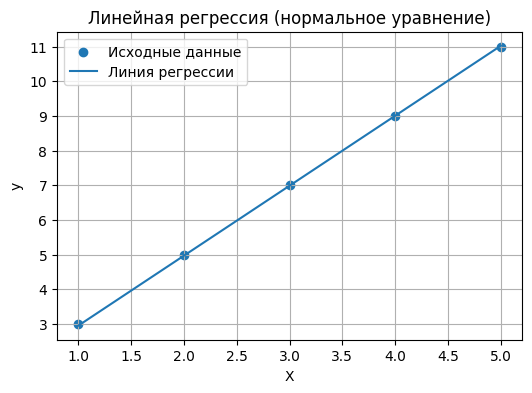

In [11]:
x_line = np.linspace(1, 5, 100).reshape(-1, 1)
y_line = x_line @ model.w + model.b

plt.figure(figsize=(6, 4))
plt.scatter(X, y, label="Исходные данные")
plt.plot(x_line, y_line, label="Линия регрессии")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Линейная регрессия (нормальное уравнение)")
plt.legend()
plt.grid()
plt.show()